# 포트폴리오 이론
## 시총 상위 5종목으로 효율적 투자선 구하기

In [2]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 63.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [10]:
#삼성전자, SK하이닉스, NAVER, 삼성바이오로직스, LG화학
stocks = ['005930', '000660', '035420', '207940', '051910']

In [15]:
# 삼전
df = stock.get_market_ohlcv_by_date(fromdate="20210501", todate="20210520", ticker="005930")['종가']
df

날짜
2021-05-03    81700
2021-05-04    82600
2021-05-06    82300
2021-05-07    81900
2021-05-10    83200
2021-05-11    81200
2021-05-12    80000
2021-05-13    78500
2021-05-14    80100
2021-05-17    79600
2021-05-18    79600
2021-05-20    79500
Name: 종가, dtype: int32

In [21]:
df = pd.DataFrame() # 20170401 - 20220401같은 긴 기간은 안 나옴. 이유 파악필요
for s in stocks: 
    df[s] = stock.get_market_ohlcv_by_date("20230401", "20230430", s)['종가']
    
df.columns = ['삼성전자', 'SK하이닉스', 'NAVER', '삼성바이오로직스', 'LG화학']

In [22]:
df

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
날짜,,,,,
2023-04-03,63100,87200,198200,778000,712000
2023-04-04,63600,84500,201000,788000,722000
2023-04-05,63900,84600,199200,788000,732000
2023-04-06,62300,83800,191900,805000,716000
2023-04-07,65000,89100,193400,796000,714000
2023-04-10,65700,90700,193000,803000,750000
2023-04-11,65900,91800,199900,812000,806000
2023-04-12,66000,90300,198000,800000,775000
2023-04-13,66100,88700,196400,815000,802000


In [23]:
daily_ret = np.log(df/df.shift(1))        #일간수익률
annual_ret = daily_ret.mean() * 252 #연간수익률
daily_cov = daily_ret.cov()         #일간변동률의 공분산
annual_cov = daily_cov * 252        #연간공분산

In [25]:
daily_ret

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
날짜,,,,,
2023-04-03,NaN,NaN,NaN,NaN,NaN
2023-04-04,0.007893,-0.031453,0.014028,0.012772,0.013947
2023-04-05,0.004706,0.001183,-0.008996,0.000000,0.013755
2023-04-06,-0.025358,-0.009501,-0.037335,0.021344,-0.022100
2023-04-07,0.042426,0.061326,0.007786,-0.011243,-0.002797
2023-04-10,0.010712,0.017798,-0.002070,0.008756,0.049190
2023-04-11,0.003040,0.012055,0.035127,0.011146,0.072011
2023-04-12,0.001516,-0.016475,-0.009550,-0.014889,-0.039221
2023-04-13,0.001514,-0.017878,-0.008114,0.018576,0.034246


In [24]:
annual_ret

삼성전자        0.495105
SK하이닉스      0.345297
NAVER      -0.400812
삼성바이오로직스    0.051045
LG화학        0.511590
dtype: float64

In [26]:
daily_cov

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
삼성전자,0.000216,0.000206,0.000112,-0.000041,0.000113
SK하이닉스,0.000206,0.000448,0.000122,-0.000056,0.000040
NAVER,0.000112,0.000122,0.000274,0.000034,0.000219
삼성바이오로직스,-0.000041,-0.000056,0.000034,0.000148,0.000119
LG화학,0.000113,0.000040,0.000219,0.000119,0.000947


In [27]:
annual_cov

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
삼성전자,0.054365,0.051922,0.028170,-0.010252,0.028528
SK하이닉스,0.051922,0.112972,0.030829,-0.014177,0.009971
NAVER,0.028170,0.030829,0.069034,0.008614,0.055063
삼성바이오로직스,-0.010252,-0.014177,0.008614,0.037304,0.029932
LG화학,0.028528,0.009971,0.055063,0.029932,0.238599


## 몬테가를로 시뮬레이션
- 반복적인 무작위적 샘플링

In [32]:
port_ret = []
port_risk = []
port_weights = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    print(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    sharpe = returns / risk # 샤프지수
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    

[0.16209337 0.26991477 0.13472068 0.23122009 0.20205108]
[0.21230245 0.21347486 0.16004737 0.26510123 0.14907409]
[0.27602228 0.15813381 0.00796737 0.47214975 0.08572679]
[0.33952768 0.10402283 0.22352691 0.07745012 0.25547246]
[0.20181598 0.39493947 0.04065051 0.31186654 0.0507275 ]
[0.27471748 0.39007746 0.10363724 0.04041904 0.19114877]
[0.07035885 0.31344389 0.13445624 0.1778001  0.30394092]
[0.03817399 0.2348491  0.33752363 0.16139282 0.22806045]
[0.40819304 0.42454766 0.03335071 0.11181271 0.02209588]
[0.15974455 0.11619389 0.12368357 0.20318338 0.39719461]
[0.33296561 0.30793933 0.04353881 0.04133917 0.27421708]
[0.04242195 0.28900816 0.13640594 0.39564205 0.13652189]
[0.29073575 0.05068705 0.12958073 0.26530479 0.26369168]
[0.27789347 0.26488981 0.19236174 0.11996645 0.14488852]
[0.21355301 0.02517608 0.24351683 0.2699725  0.24778159]
[0.11481984 0.14109555 0.29195199 0.18283772 0.2692949 ]
[0.02649587 0.21653623 0.45188632 0.03650203 0.26857956]
[0.08999025 0.00569339 0.276224

[0.31396651 0.30770413 0.08116819 0.2191016  0.07805957]
[0.20377532 0.25106499 0.02375361 0.26845884 0.25294723]
[0.04674685 0.32145552 0.32368639 0.26445282 0.04365842]
[0.01685012 0.26046666 0.13888892 0.47062841 0.1131659 ]
[0.02057201 0.07257932 0.38582942 0.34597729 0.17504196]
[0.23013798 0.12394303 0.05754023 0.1853993  0.40297947]
[0.4645436  0.20504214 0.08989889 0.20136565 0.03914972]
[0.24746259 0.27308465 0.28773795 0.04806097 0.14365384]
[0.27094701 0.11231594 0.33707017 0.25056061 0.02910627]
[0.26296073 0.10556744 0.12194872 0.24743235 0.26209076]
[0.23491388 0.11756054 0.11918955 0.32038015 0.20795588]
[0.09878547 0.16796419 0.25694239 0.261431   0.21487696]
[0.38710012 0.21370326 0.00098104 0.17978598 0.21842961]
[0.3188744  0.22658811 0.18683108 0.18593266 0.08177375]
[0.36456382 0.05628054 0.12687604 0.27114065 0.18113896]
[0.28480979 0.08201911 0.17291547 0.06800346 0.39225218]
[0.27975762 0.20934632 0.14429799 0.13897706 0.22762101]
[0.31842758 0.32258841 0.033234

[0.16391149 0.23849119 0.26348715 0.23151192 0.10259826]
[0.14130735 0.34202563 0.20655585 0.23756168 0.07254948]
[0.1335475  0.10477363 0.17698138 0.23582883 0.34886865]
[0.04527486 0.06208756 0.13596557 0.36888436 0.38778765]
[0.26050777 0.09192001 0.02037582 0.36607702 0.26111938]
[0.34850317 0.24025622 0.0314636  0.10026337 0.27951364]
[0.25561057 0.10606685 0.15841495 0.22788024 0.25202739]
[0.18850487 0.3181073  0.3373322  0.13729468 0.01876095]
[0.15240029 0.16699197 0.30034674 0.07562286 0.30463814]
[0.27913033 0.07467892 0.17797475 0.22812946 0.24008654]
[0.15352417 0.06980992 0.24370716 0.27192303 0.26103572]
[0.16755618 0.08376267 0.38780288 0.20028847 0.16058979]
[0.0733054  0.33224474 0.16312081 0.12851583 0.30281323]
[0.1665733  0.02964805 0.12039675 0.57653215 0.10684974]
[0.27716362 0.2207384  0.05544442 0.27852342 0.16813014]
[0.03876    0.27054236 0.0504208  0.04862916 0.59164768]
[0.00881353 0.08882162 0.22127528 0.30070216 0.38038741]
[0.27901513 0.25494964 0.062400

[0.39063363 0.52241332 0.02639246 0.05184968 0.00871091]
[0.40677129 0.03554216 0.29287613 0.25129941 0.01351101]
[0.02378635 0.18834091 0.44440219 0.24396238 0.09950817]
[0.19586274 0.31825418 0.02881307 0.2950622  0.16200781]
[0.09911581 0.10562968 0.32196145 0.22357144 0.24972163]
[0.2817327  0.30526935 0.10674331 0.07005259 0.23620205]
[0.25492414 0.19727061 0.09899983 0.29797148 0.15083394]
[0.33913749 0.34690627 0.01736803 0.2579902  0.038598  ]
[0.24595976 0.25537962 0.06429031 0.11653981 0.3178305 ]
[0.22429107 0.18326552 0.2251983  0.1960611  0.17118401]
[0.10779335 0.39042583 0.37595502 0.09467439 0.03115141]
[0.05855376 0.14308362 0.27037599 0.4445315  0.08345513]
[0.32993829 0.03943159 0.15850684 0.22006436 0.25205892]
[0.0210539  0.31118709 0.11410512 0.36806053 0.18559336]
[0.26782864 0.17281434 0.25574965 0.12777065 0.17583672]
[0.16215257 0.01604605 0.34742249 0.15180757 0.32257132]
[0.14527956 0.07203306 0.37819112 0.38210892 0.02238734]
[0.05120703 0.18109486 0.036639

[0.08846665 0.32813529 0.21348093 0.19491038 0.17500675]
[0.3721171  0.182329   0.19078037 0.03222564 0.22254789]
[0.26868724 0.15578727 0.20457176 0.16122209 0.20973163]
[0.06036425 0.37547284 0.0769802  0.13982056 0.34736215]
[0.31797558 0.27017169 0.32120482 0.00862151 0.08202641]
[0.02098024 0.37269754 0.130645   0.2416625  0.23401471]
[0.06468195 0.25902214 0.20669015 0.13317755 0.33642822]
[0.34767708 0.41401835 0.01087752 0.19304722 0.03437982]
[0.18161714 0.21854814 0.16369915 0.30298766 0.13314791]
[0.01880305 0.2405892  0.29389014 0.29372083 0.15299678]
[0.01292189 0.24942143 0.32356125 0.20111347 0.21298197]
[0.30922285 0.10603075 0.29649236 0.03949652 0.24875752]
[0.05590026 0.23604556 0.25665706 0.22337056 0.22802656]
[0.28314497 0.07247797 0.28777655 0.187639   0.16896152]
[0.30427652 0.06500086 0.17680881 0.2797575  0.17415632]
[0.36402395 0.07825486 0.12860212 0.15211902 0.27700006]
[0.42746304 0.3460026  0.12010684 0.03982474 0.06660277]
[0.11994122 0.22247931 0.087142

[0.08784572 0.13721079 0.39209463 0.30156114 0.08128772]
[0.29688935 0.12823227 0.37392036 0.07715395 0.12380408]
[0.25187893 0.06737708 0.20006572 0.17626337 0.3044149 ]
[0.19476747 0.6491778  0.07238223 0.02004308 0.06362943]
[0.13194574 0.13467362 0.36791552 0.14887286 0.21659226]
[0.04706516 0.2290601  0.36263334 0.30860644 0.05263496]
[0.0652679  0.2891305  0.28908045 0.04325729 0.31326387]
[0.13208767 0.10723159 0.37625206 0.25626491 0.12816377]
[0.09537616 0.22439861 0.29623849 0.34084971 0.04313703]
[0.19839157 0.23375694 0.19829448 0.17551855 0.19403846]
[0.23729338 0.27420003 0.2211106  0.11875825 0.14863774]
[0.31057989 0.07958536 0.15131533 0.09694126 0.36157816]
[0.10813713 0.36788935 0.00574    0.14607978 0.37215374]
[0.11858321 0.13913799 0.34205549 0.19384425 0.20637905]
[0.21744289 0.22022339 0.0342625  0.24074266 0.28732857]
[0.20365221 0.25649178 0.22484341 0.03854511 0.2764675 ]
[0.02582263 0.20550454 0.33992554 0.15993492 0.26881238]
[0.3598656  0.03695882 0.170453

[0.23447049 0.28838619 0.01344495 0.20111053 0.26258784]
[0.23669489 0.06861267 0.18338388 0.40857115 0.10273741]
[0.26429624 0.03790527 0.19918017 0.25401673 0.24460158]
[0.17998079 0.13666788 0.36183682 0.01108308 0.31043143]
[0.36320654 0.08102522 0.0644268  0.22404111 0.26730034]
[0.24004487 0.13573586 0.14233766 0.33723928 0.14464234]
[0.35821355 0.14710165 0.21368158 0.27607129 0.00493194]
[0.35372207 0.09011991 0.10180669 0.43460206 0.01974927]
[0.21218119 0.14914853 0.34594329 0.03308287 0.25964412]
[0.06250161 0.00999652 0.32318221 0.42370815 0.1806115 ]
[0.16125238 0.25357536 0.27313516 0.08433236 0.22770474]
[0.15042056 0.4806588  0.02513458 0.1524058  0.19138027]
[0.25467348 0.13693803 0.36799024 0.0772659  0.16313235]
[0.34140794 0.00911801 0.14467436 0.22031701 0.28448267]
[0.15118045 0.12662651 0.22857391 0.27401157 0.21960755]
[0.32545999 0.17510969 0.20747535 0.00174377 0.29021121]
[0.21467884 0.39173079 0.28747517 0.08867795 0.01743725]
[0.0240051  0.32055865 0.108886

[0.06060289 0.29452543 0.24250016 0.2849751  0.11739642]
[0.24364493 0.12820291 0.27208851 0.26607598 0.08998767]
[0.2288094  0.22874758 0.13549994 0.21634167 0.19060142]
[0.21868259 0.14337239 0.35856517 0.09753423 0.18184561]
[0.23283245 0.18707103 0.07460264 0.23829643 0.26719745]
[0.12587724 0.30506813 0.26019354 0.06124055 0.24762054]
[0.07345876 0.17114639 0.23927809 0.23398    0.28213676]
[0.10336494 0.35796726 0.10004293 0.10131742 0.33730745]
[0.08884428 0.16744888 0.14881212 0.29515012 0.29974461]
[0.24448894 0.1904509  0.2562354  0.14348072 0.16534404]
[0.09213056 0.35181739 0.09310834 0.19895616 0.26398756]
[0.1664846  0.06159431 0.23149609 0.1948387  0.3455863 ]
[0.0347846  0.30670244 0.26135274 0.12599787 0.27116236]
[0.22878508 0.24705611 0.26618417 0.11001754 0.14795711]
[0.17617214 0.27987845 0.1683689  0.27981924 0.09576126]
[0.19419212 0.22438848 0.0947224  0.03545974 0.45123727]
[0.07707148 0.13012295 0.21195043 0.45434453 0.12651062]
[0.17582567 0.20678137 0.303074

[0.13043182 0.24817159 0.04431983 0.29052846 0.2865483 ]
[0.14954461 0.10577337 0.14788297 0.34227785 0.2545212 ]
[0.34556673 0.25754095 0.18218592 0.12514014 0.08956626]
[0.0142449  0.27301272 0.21865679 0.20503048 0.28905511]
[0.14268192 0.17149322 0.37498559 0.0746527  0.23618656]
[0.26776423 0.24341259 0.15932652 0.27713264 0.05236402]
[0.47028158 0.19241774 0.16212536 0.02371743 0.15145789]
[0.1155432  0.19553963 0.19523455 0.24069381 0.25298882]
[0.22842748 0.1892519  0.22203187 0.21598987 0.14429888]
[0.42632181 0.36263907 0.05646384 0.11070197 0.04387331]
[0.29775694 0.12868596 0.06523531 0.26425546 0.24406632]
[0.11522569 0.02457099 0.34571856 0.28750454 0.22698022]
[0.25404685 0.2169886  0.28850239 0.18480413 0.05565803]
[0.50157939 0.0121904  0.00402353 0.4352328  0.04697388]
[0.48416531 0.00445033 0.00173037 0.37776949 0.13188449]
[0.14063047 0.27057637 0.11282125 0.36355644 0.11241546]
[0.0508056  0.12167264 0.36080381 0.13636146 0.33035649]
[0.08780879 0.44697813 0.001264

[0.20332068 0.19469677 0.28211649 0.10064362 0.21922245]
[0.16712172 0.0667673  0.24708636 0.28896644 0.23005818]
[0.23448029 0.19322453 0.09172693 0.27794254 0.20262572]
[0.10165234 0.35189875 0.10586014 0.32387465 0.11671411]
[0.23696862 0.20399873 0.11531944 0.02414201 0.4195712 ]
[0.11935389 0.16880327 0.27583706 0.16143185 0.27457393]
[0.45457074 0.06385635 0.05143496 0.42823759 0.00190036]
[0.09339979 0.39701043 0.09347975 0.09433218 0.32177786]
[0.32932794 0.04983551 0.25479959 0.0153868  0.35065016]
[0.08574273 0.13690074 0.02600255 0.01226992 0.73908406]
[0.06084209 0.1358914  0.31096772 0.20938953 0.28290926]
[0.52004261 0.08151565 0.09828681 0.16043987 0.13971506]
[0.3247707  0.39171402 0.0116425  0.01626084 0.25561193]
[0.40988058 0.12065156 0.10744777 0.28553501 0.07648508]
[0.24867625 0.25831639 0.06437312 0.15382502 0.27480922]
[0.04916863 0.240317   0.14551434 0.30461947 0.26038056]
[0.27008333 0.20063915 0.28171483 0.03187071 0.21569198]
[0.11439291 0.31447074 0.070063

In [33]:
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df.columns = ['Returns','Risk','삼성전자', 'SK하이닉스', 'NAVER', '삼성바이오로직스', 'LG화학']
df.head()

,Returns,Risk,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
0,0.234626,0.193422,0.162093,0.269915,0.134721,0.231220,0.202051
1,0.204472,0.177269,0.212302,0.213475,0.160047,0.265101,0.149074
2,0.256028,0.145498,0.276022,0.158134,0.007967,0.472150,0.085727
3,0.249079,0.220443,0.339528,0.104023,0.223527,0.077450,0.255472
4,0.261869,0.177522,0.201816,0.394939,0.040651,0.311867,0.050727


## 효율적 투자선 그래프

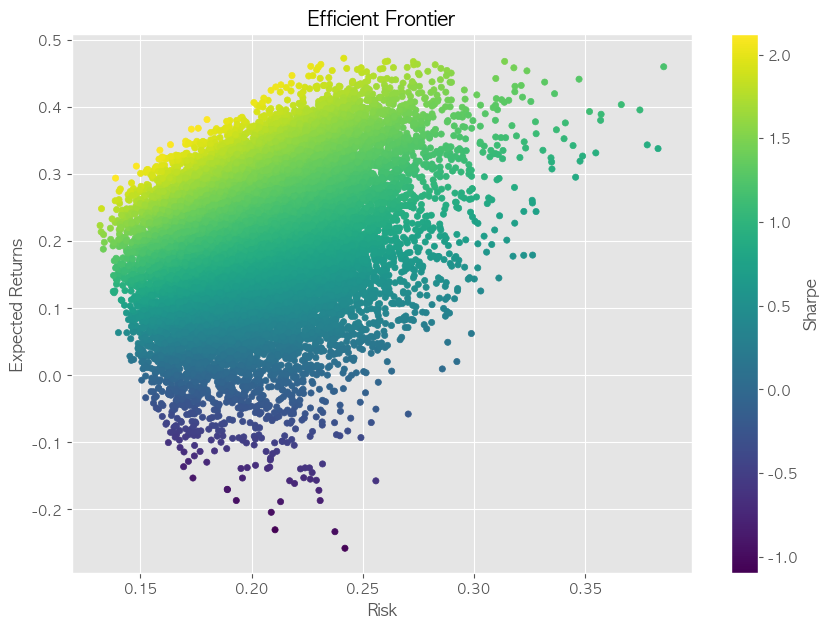

In [36]:
plt.style.use('ggplot')
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), c='Sharpe', cmap = 'viridis')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

# 샤프지수와 포트폴리오 최적화
### 샤프지수 = (포트폴리오 예상수익률 - 무위험률) / 수익률의 표준편차
- 위험을 감수한 수익이 얼마인지를 측정하는 지표

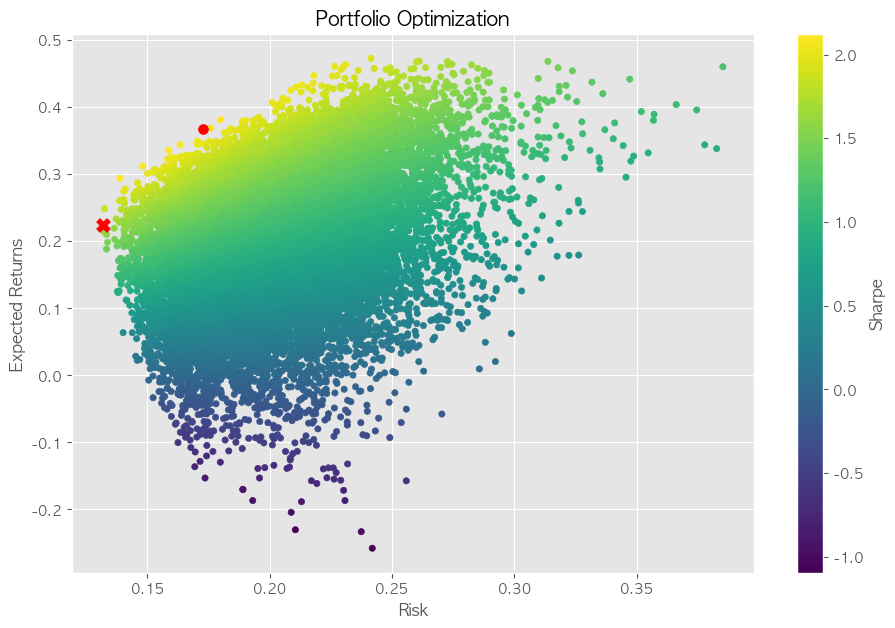

In [35]:
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df.columns = ['Returns','Risk', 'Sharpe','삼성전자', 'SK하이닉스', 'NAVER', '삼성바이오로직스', 'LG화학']


max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

# plot

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap = 'viridis', figsize = (11,7))
plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'], c = 'r',  s=50)
plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'], c = 'r', marker = 'X', s=100)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [37]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,LG화학
9297,0.367519,0.172936,2.125179,0.618187,0.000244,0.023113,0.244822,0.113634
